<a href="https://colab.research.google.com/github/jarbaem/datasciencelearning/blob/main/P153870_Project_2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Deep Diving into Global Nike 2024 Sales`**

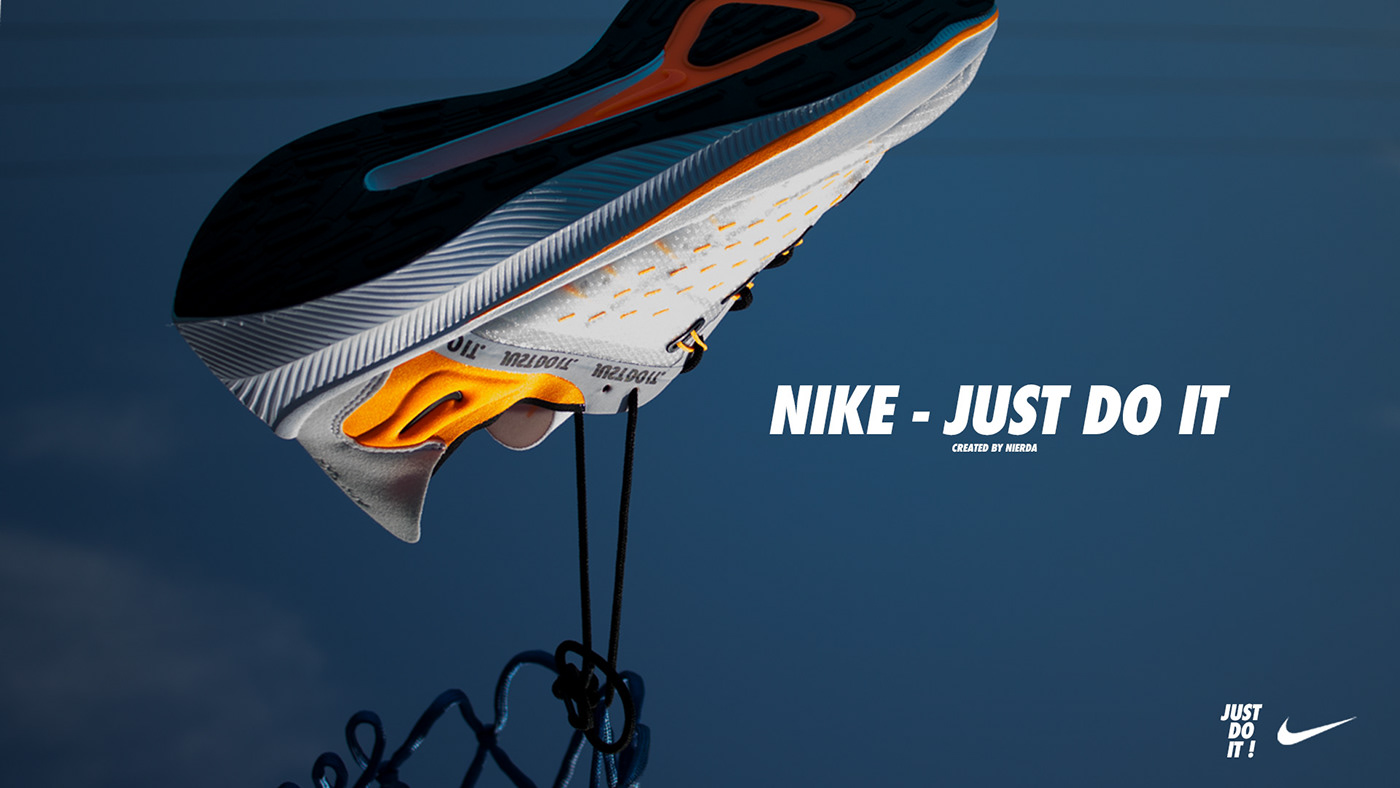

---




# **Introduction**



Nike is one of the worlds' leading sportswear brands, operating in a highly competitive global market. Nike has continually adapted to market trends to maintain its dominace in the industry. With dynamic conflicts and socio-economic fluctuantions in 2024, let's dive deeply into what factors that influences the company's global sales performance.



Business intelligence plays a crucial role in analyzing datasets to derive insights and support informed decision-making. This analysis aims to understand Nike's global sales trends in 2024, identify peak and dip periods, and explore potential factors influencing these trends. By analyzing regional sales performance, identifying top-selling product categories and subcategories, and understanding consumer behavior across different price tiers, we can gain valuable insights into Nike's business and explore potential areas for improvement.

# Problem Statement

To achieve analysis goals for Nike Global Sales 2024, we firstly estabslihed the problem statements before conducting analysis. We want to understand:

1. **Global Sales Trend**
- How does the global sales trend in 2024 look?
- Where are the peaks and dips in sales, and what factors might be contributing to these fluctuations in certain region (e.g., seasonality, economic conditions, marketing campaigns)?

2. **Regional Sales Performance**
- What sales performance across different regions look like and what is the most popular product categories in each region.

3. **Product Category Analysis**
-  Which sub-category products contribute most and least to Nike's global sales?
- What is the relationship between product sold online and revenues for these sub-categories?

4. **Consumer Behavior**
- To understand which products sell best across different main categories.
- To analyse the seasonality of purchases across various price tier (premium, mid-range, and budget)





---


#Data Processing

Data Source: [Nike 2024 Global Sales Data](https://www.kaggle.com/datasets/ayushcx/nike-global-sales-data-2024/data)


In [133]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter

In [134]:

#importing data
nike = pd.read_csv('nike_sales_2024.csv') #import from file
nike.head() #to get the idea of the data structure
nike.info() #to get insight of data

#so the nike data has 1000 entries with 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [135]:
#data pre-processing

#1. checking for missing values
nike.isnull().sum()

#2. change month string to date object and add as new column

nike['Month'] = pd.to_datetime(nike['Month'] + ' 2024', format='%B %Y')
nike.info() #to check the format

#3. To check unique items for all categorical variable to ensure no duplicates

nike['Region'].unique()
nike['Main_Category'].unique()
nike['Sub_Category'].unique()
nike['Product_Line'].unique()
nike['Price_Tier'].unique() #there are no duplicates values


#4. to factor categorical columns

nike['Main_Category'] = pd.Categorical(nike['Main_Category'])
nike['Sub_Category'] = pd.Categorical(nike['Sub_Category'])
nike['Price_Tier'] = pd.Categorical(nike['Price_Tier'])

#5. to sort the date in chronological order
nike = nike.sort_values(by='Month')

#6. scale down the units in K unit (thousand)
nike['Units_Sold_K'] = nike['Units_Sold'] / 1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    1000 non-null   datetime64[ns]
 1   Region                   1000 non-null   object        
 2   Main_Category            1000 non-null   object        
 3   Sub_Category             1000 non-null   object        
 4   Product_Line             1000 non-null   object        
 5   Price_Tier               1000 non-null   object        
 6   Units_Sold               1000 non-null   int64         
 7   Revenue_USD              1000 non-null   int64         
 8   Online_Sales_Percentage  1000 non-null   int64         
 9   Retail_Price             1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.3+ KB



---

#Results and Discussion (Exploratory Data Analysis)

## **1. Monthly Revenue Trends Across Regions in 2024**

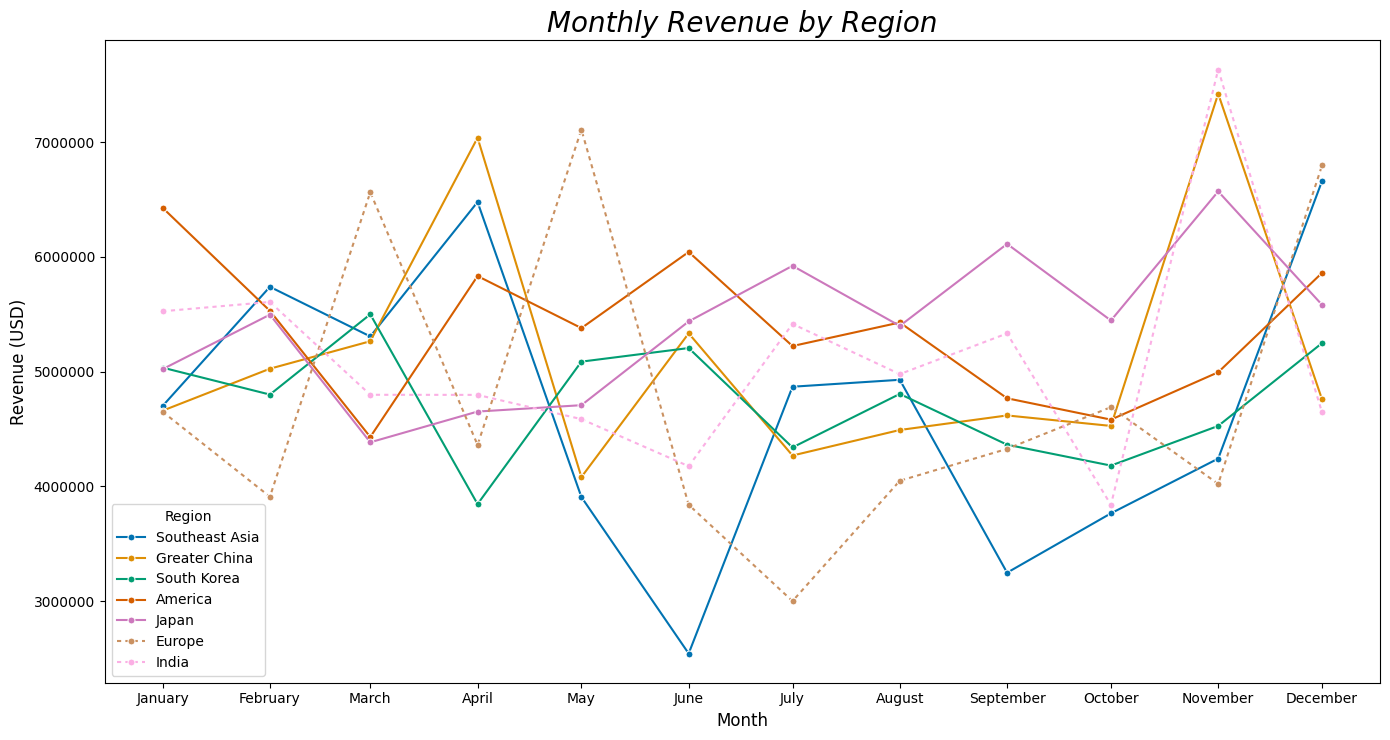

In [136]:
#create a a line plot

plt.figure(figsize=(14, 7.5)) #adjust the size of graph.

dash_styles = {   #this part is to create a dashed-line on specific regions only
    'Japan': '',
    'Southeast Asia': '',
    'Japan':'',
    'Europe':(2,2),
    'South Korea':'',
    'Greater China':'',
    'America':'',
    'India': (2,2)
}

#plotting the graph
sns.lineplot(data=nike,
             x='Month',
             y='Revenue_USD',
             hue='Region',
             style = 'Region',
             dashes= dash_styles ,
             palette= 'colorblind',
             marker = 'o', markersize = 5,
             errorbar= None)

#this is for x-axis to display all months and in %B format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%B")) #to display in Month

#this set for y-axis to not convert number into scientific format. just keep it original
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Labels and legend
plt.title("Monthly Revenue by Region", fontsize=20, style = 'oblique')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.legend(title="Region")
plt.tight_layout()

plt.show()

### Explanation

The revenue trends across regions in 2024 reveal compelling patterns.

- From April to May, sales generally peaked likely due to seasonal factors suach as the start of the Spring season, which aligns with increased customer activity for outdoor events, sports tournament etc. Warmer weather promotes outdoor activities.

- In June, we witnessed a notable dip in sales in Southeast Asian (SE)region, which potentially driven by socio-political factors like ongoing boycotts in solidarity with Palestine. A news reported on social media in June, an activist supporter of Palestine intended to wear shoes marked with "FREE PALESTINE" to express solidarity in a running event in Dublin. So, he ordered a personalised shoes but Nike had cancelled his order. Nike's actions consequently generated widespread negative sentiment especially in the Muslim-majority SE nations, Malaysian and Indonesia, explaining the decreased sales in June for this region.

- While in November, we saw sales surges in three regions, attributed to a highly discounted promotion during Black Friday Sales. Similarly in December, Nike experienced increased sales during this month in conjunction with festive season like Christmas and New Year Eve, and Boxing Day sales.






## **2. Nike Revenue by Product Category Across Regions**




In [137]:
#create an aggregated data frame for stacked bar chart
sum_category = nike.pivot_table(index = 'Region',  #for each region
                                columns = 'Main_Category', #group by columns
                                values = 'Revenue_USD', #and calculate sum
                                aggfunc = 'sum')
region_totals = sum_category.sum(axis=1)
percentage_contribution = sum_category.div(region_totals, axis=0) * 100
max_percentage = percentage_contribution.idxmax(axis=1)


<ipython-input-137-93140d880305>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sum_category = nike.pivot_table(index = 'Region',  #for each region


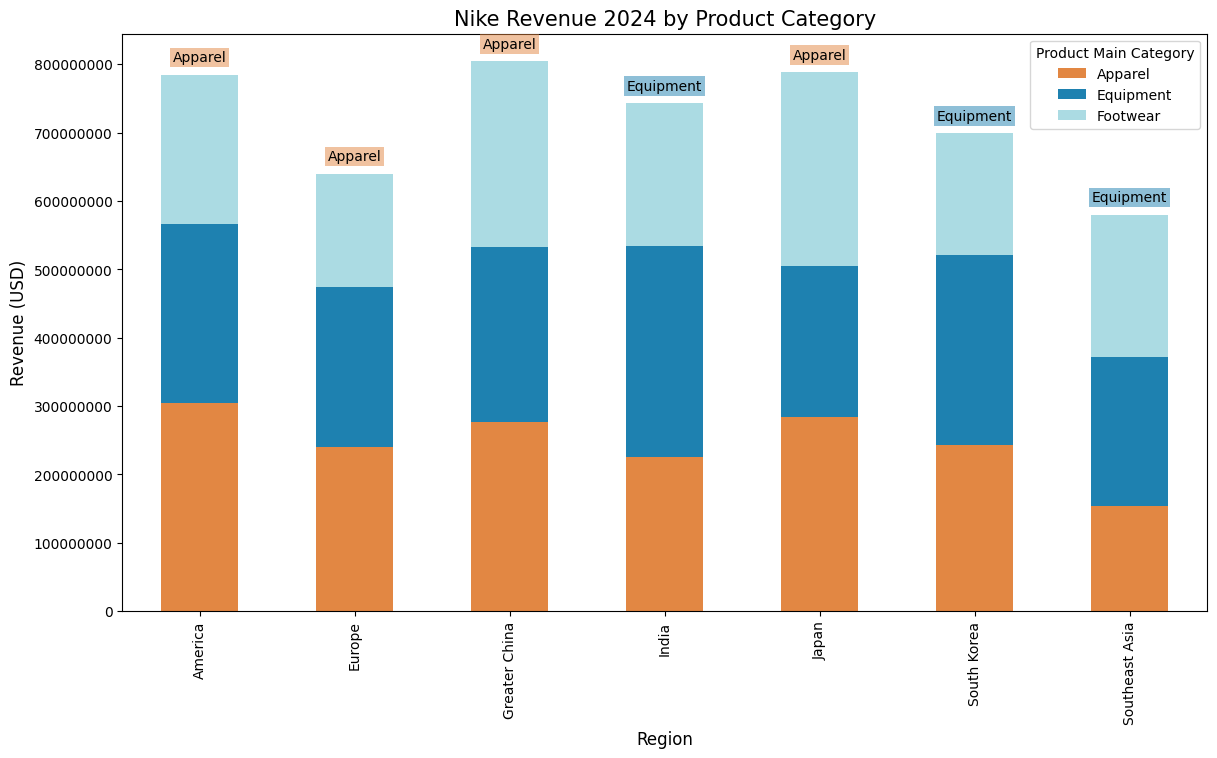

In [138]:
#plotting
ax = sum_category.plot(kind='bar', stacked=True, figsize=(14, 7.5), color=['#e28743', '#1e81b0', '#abdbe3'])

face_colors = {          #this is to assign text background colour
    'Apparel': '#e28743',
    'Equipment': '#1e81b0',
    'Footwear': '#abdbe3'
}


# add text labels for the category with the highest contribution

for i, Region in enumerate(sum_category.index):
    max_cat = max_percentage.loc[Region]  # get the max category for the region
    total_revenue = region_totals[Region]  #get total revenue to get y-coordinate of text staying on the top
    x_pos = i  # x-coordinate of the bar
    y_pos = total_revenue + 15000000  # add extra y to have a space between bars and text

    text_bg_color = face_colors.get(max_cat, 'white') #to get the background

    ax.text(x_pos, y_pos, max_cat, ha='center', va='bottom', fontsize=10,
            bbox=dict(facecolor=text_bg_color, alpha=0.5, pad=2, edgecolor='none'))

plt.title("Nike Revenue 2024 by Product Category", fontsize=15, style = 'normal')
#plt.suptitle("with category label of highest revenue contribution ", fontsize=12)

plt.xlabel("Region", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.legend(title="Product Main Category")

plt.show()

### Explanation

- From the plot, we can see the top three revenue-generating regions for Nike sales in 2024 were Europe, Greater China, and Japan, with the apparel category contributing the most revenue. This is a proof that  Nike establish strong customer loyalty and positive brand perception in these regions.

- Conversely, Southeast Asia contributed the least revenue, with equipment being the most purchased product category, slightly outperforming footwear. However, the difference between the two categories is minimal. Therefore, we suggest that Nike to implement targeted marketing strategies in footwear products for this region, aiming to establish footwear as the dominant product category in at least one region.

## 3. **Relationship Between Revenue and Online Sales Contribution**


In [139]:
#need to prepare data frame first

grouped_category = nike.groupby('Sub_Category').agg(
    Total_Revenue=pd.NamedAgg(column='Revenue_USD', aggfunc='sum'),
    Mean_Online_Sales =pd.NamedAgg(column='Online_Sales_Percentage', aggfunc='mean')).reset_index()

<ipython-input-139-6cd255981ce7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_category = nike.groupby('Sub_Category').agg(


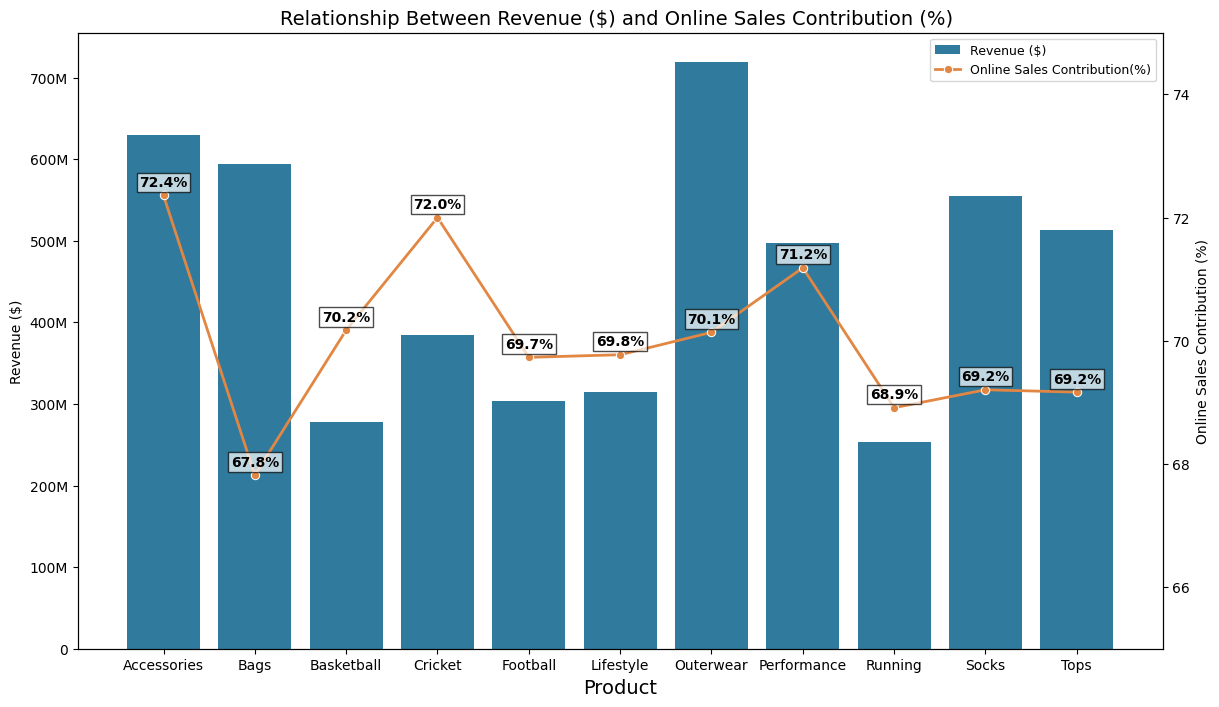

In [140]:
# plot using SEABORN

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.grid(False)

#first plot
sns.barplot(x = "Sub_Category", y = "Total_Revenue",
            data = grouped_category,
            color = '#1e81b0', label = "Revenue ($)",
            errorbar=None, ax = ax1)

ax2 = ax1.twinx() #to pair the axis
ax2.grid(False) #remove grids
ax2.set_ylim(65, 75)  #set limit
sns.lineplot(x="Sub_Category", y = "Mean_Online_Sales",
                    data = grouped_category,
                    color = '#e28743',
                    marker = 'o',
                    linestyle = '-',
                    linewidth = 2,
                    label = "Online Sales Contribution(%)",
                    errorbar= None, ax = ax2, )

for i, value in enumerate(grouped_category['Mean_Online_Sales']):  #to format the percentage formatting
    ax2.text(i, value + 0.1, f"{value:.1f}%",
             ha='center', va='bottom',
             fontsize=10, color='black',
             fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, pad =2 ))

# define a function to format the y-axis labels
def millions(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:
        return f'{x/1e6:.0f}M'  # display in millions with 0 decimal places
    else:
        return f'{x:.0f}'  # display as integer for values less than 1 million

# set y-axis formatter
ax1.yaxis.set_major_formatter(FuncFormatter(millions))


ax1.set_ylabel('Revenue ($)', fontsize=14)
ax2.set_ylabel('Online Sales Contribution (%)', fontsize=14)
ax1.set_xlabel('Product', fontsize=14)

plt.title('Relationship Between Revenue ($) and Online Sales Contribution (%) ', fontsize=14)

lines, labels = ax1.get_legend_handles_labels() #to get legend one
lines2, labels2 = ax2.get_legend_handles_labels() #to get legend two
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=9) #combine legend on the first plot
ax2.get_legend().remove()


ax1.set_ylabel('Revenue ($)', fontsize=10)
ax2.set_ylabel('Online Sales Contribution (%)', fontsize=10)
ax1.set_xlabel('Product', fontsize=14)

plt.show()


### Explanation

- The graph informs us the correlation between revenue and the percentage contribution of online sales. In general, online sales account for 60–75% of Nike’s revenue, indicating significant commitments by Nike to establish a strong online presence.

- In 2024, Nike was critised for overcommitment to online commerce and introduced an inventory buildup from supply chain disruptions. To address the issue, Nike offered discounts, which to reduce inventory and this has impacted profit margins.
Addressing these operational challenges will be critical for Nike's continued dominance in e-commerce.[Source](https://www.theglobaltreasurer.com/2024/07/24/why-nike-is-struggling-while-adidas-is-soaring-in-2024/)

- Additionally from the graph, we can see that high-demand online sub-categories include Accessories and Cricket gear, followed closely by other performance-oriented products. However, bags exhibit the least online demand as customers tend to prefer purchasing bags in physical stores, likely to evaluate size and quality firsthand.
Outerwear products, such as windrunner jackets, generated the most revenue online in 2024, followed by accessories and bags, emphasizing the need for enhanced marketing campaigns targeting high-performing categories.


##4. Units Sold Per Product Line




In [141]:
#preparing data to aggregate


cat_colors = {                #for bar colours
    'Apparel': '#87BB62',
    'Equipment': '#1e81b0',
    'Footwear': '#F8AE54'
    }

#to group by product
revenue_by_product = nike.groupby(['Product_Line','Main_Category'])['Units_Sold_K'].sum().reset_index()

#sort product by units sold
sorted_rev_product = revenue_by_product.sort_values(by='Units_Sold_K', ascending=True)
final_rev_products = sorted_rev_product.tail(24)  #after sort out, only tails 24th are not blank

#mapping colour to main category
final_rev_products['Colour'] = final_rev_products['Main_Category'].map(cat_colors)


<ipython-input-141-b7ddbef43059>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_product = nike.groupby(['Product_Line','Main_Category'])['Units_Sold_K'].sum().reset_index()
<ipython-input-141-b7ddbef43059>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rev_products['Colour'] = final_rev_products['Main_Category'].map(cat_colors)


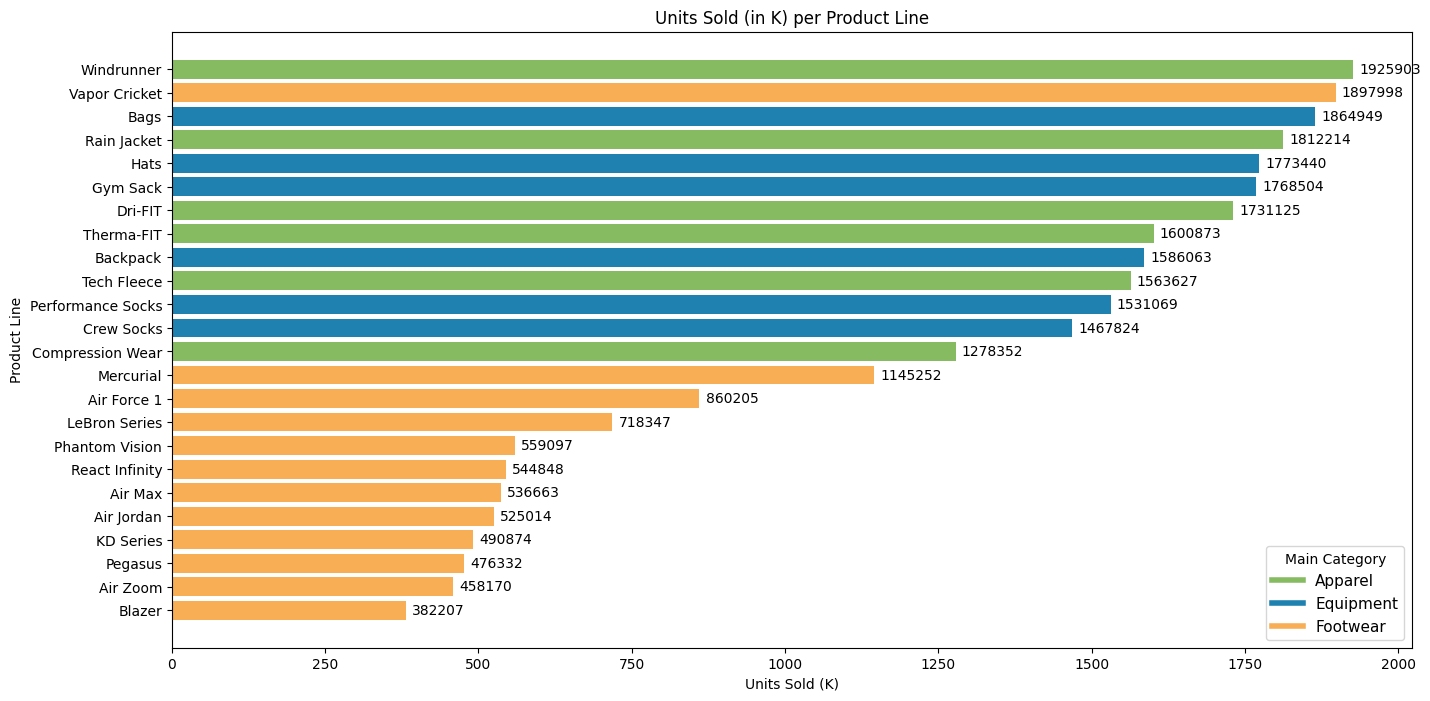

In [142]:

#plotting the graph

plt.figure(figsize=(16, 8))

bars = plt.barh(final_rev_products['Product_Line'], final_rev_products['Units_Sold_K'], color=final_rev_products['Colour'])

plt.title("Units Sold (in K) per Product Line")
plt.xlabel("Units Sold (K)")
plt.ylabel("Product Line")

#to format units in K
def format_thousands(x, pos):
    return f'{int(x / 1000)}K'

# add labels to bars
for bar, units in zip(bars, final_rev_products['Units_Sold_K']):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, f"{int(units*1000)}", #need to multiply back to 1000 to display full
             va='center', fontsize=10)

#add legend
handles = [plt.Line2D([0], [0], color=cat_colors[cat], lw=4, label=cat) for cat in cat_colors]
plt.legend(handles=handles, title='Main Category', fontsize=11)

plt.show()


### Explanation

- This visualization explores unit sales performance across Nike's product lines in 2024. Among apparel categories, the Windrunner product line emerged as the most sold, showcasing its high-quality craftsmanship and positive customer perception.

- In the footwear category, the Vapor Cricket line achieved the highest sales, possibly due to its appeal to a niche but dedicated customer base in cricket-playing regions. The second most sold footwear line was the Mercurial, a football shoe catering to soccer enthusiasts.

- Bags topped the sales within the equipment category, driven by diverse designs, including backpacks, school bags, gym bags, and sports bags. These versatile designs ensured consistent sales performance.
Interestingly, most footwear product lines did not dominate overall sales. This aligns with Nike's strategy of releasing shoes in limited stocks and timeframes to maintain their exclusivity. However, the exception lies in product lines like the Vapor Cricket.

- The Nike Blazer, a lifestyle shoe targeting skateboarding communities, experienced lower sales due to its relatively small niche market. Designed with unique features to appeal to skateboarders, the Blazer is characterized by its stylish and durable design.


## 5. Monthly Trend for Units Sold by Price Tier


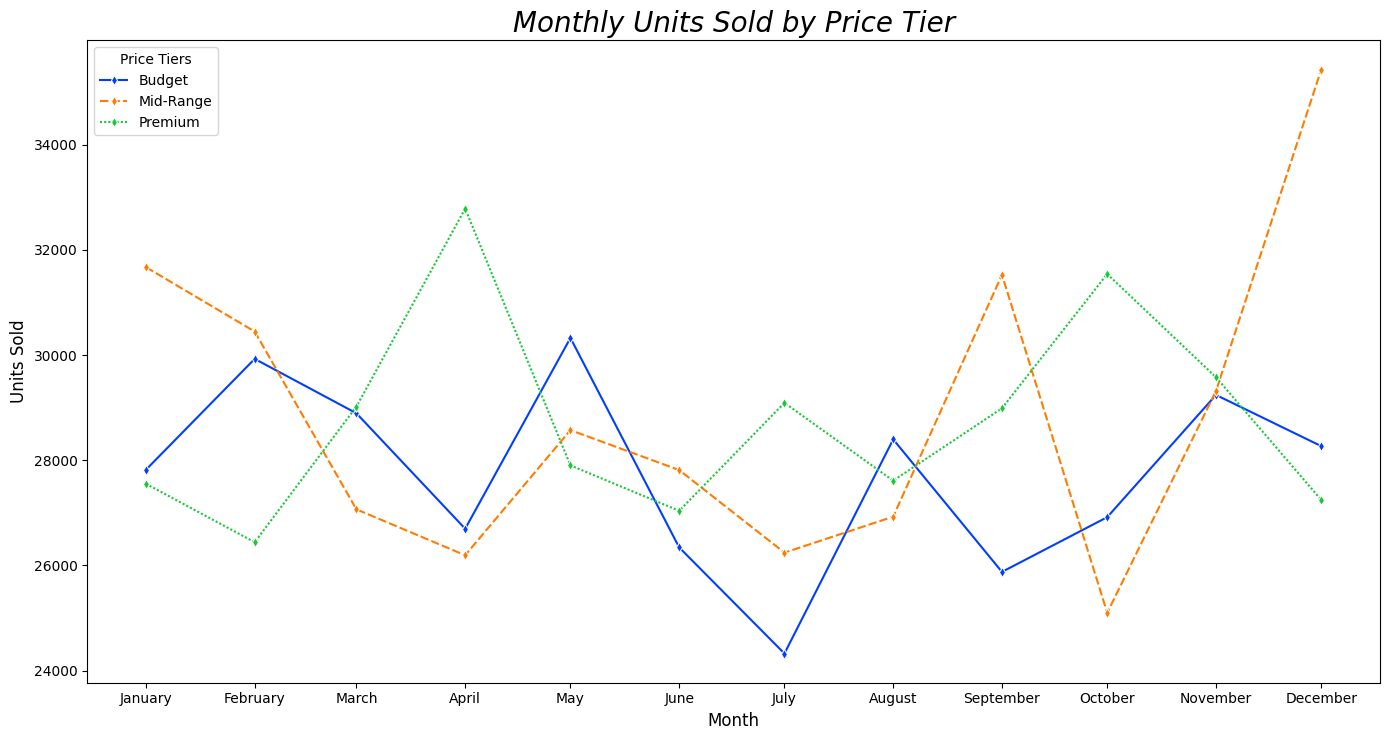

In [143]:
#create a line plot

plt.figure(figsize=(14, 7.5)) #adjust the size of graph.

#plotting the graph
sns.lineplot(data=nike,
             x='Month',
             y='Units_Sold',
             hue='Price_Tier',
             style = 'Price_Tier',
             palette= 'bright',
             marker = 'd', markersize = 5,
             errorbar= None)

#this is for x-axis to display all months and in format in string not datetime
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%B")) #to display in Month

#this is for y-axis to not convert number into scientific format. keep it original
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)


# Labels and legend
plt.title("Monthly Units Sold by Price Tier", fontsize=20, style = 'oblique')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.legend(title="Price Tiers")
plt.tight_layout()

plt.show()

#### Explanation

- Analyzing units sold across price tiers revealed several trends.
Budget-tier products maintained consistent sales throughout the year, unaffected by seasonal fluctuations.

- Premium-tier products experienced a notable spike in April but showed minimal activity during other months. This April spike might coincide with the Spring season or exclusive product launches, which resonate with high-income consumers.

- Mid-range products, however, experienced a dip in sales in October, suggesting reduced customer engagement or a lack of promotional activities during this period.

- In December, all tiers exhibited high sales volumes, driven by end-of-year promotional campaigns and festive season discounts. These factors likely incentivized customers to make purchases at discounted rates during this time, contributing to significant sales growth.



---


# Conclusion

Nike’s 2024 global sales reflect a mix of seasonal events, such as Spromotions and festive periods, and socio-political influences, including controversies like the Southeast Asia boycott over Nike’s perceived stance on Palestine. Key findings from the analysis are:

- Spring seasons and festive periods drive significant peaks in revenue, while controversies and logistical issues hinder performance in specific regions like Southeast Asia.

- Apparel dominates revenue across most regions, with strong contributions from the Americas, Europe, China, and Japan.

- Online sales constitute a major revenue driver, particularly for performance-oriented products like accessories and cricket gear, but require logistical improvements.

- Diverse customer preferences result in variable performance across product lines, emphasizing the need for niche-targeted strategies in footwear and other categories.

- Seasonal analysis highlights the importance of aligning marketing efforts with consumer demand during high-purchase months.



Based on analysis in 2024, we recommend for Nike, in order to maintain growth in 2025, Nike should anticipate political and socio-economic dynamics, such as the evolving U.S. trade policies and advertising platform restrictions (e.g., TikTok bans). By strengthening its marketing and operational frameworks and coupled with a focus on humanity and social perception, this will ensure Nike to succeed in the dynamic global market.




